In [1]:
"""
import numpy as np
#from sqlalchemy import create_engine, text
import pandas as pd
import yaml
import ast
import json
import numpy as np
import scipy as sp
import copy
import os 
import pathlib
import sys
import requests
import io
import time
import re
import matplotlib.pyplot as plt

%matplotlib inline
"""

'\nimport numpy as np\n#from sqlalchemy import create_engine, text\nimport pandas as pd\nimport yaml\nimport ast\nimport json\nimport numpy as np\nimport scipy as sp\nimport copy\nimport os \nimport pathlib\nimport sys\nimport requests\nimport io\nimport time\nimport re\nimport matplotlib.pyplot as plt\n\n%matplotlib inline\n'

In [2]:
# all code is based on path /hpflex_vis/
#repo_path=pathlib.Path(os.getcwd()).parents[1].absolute().__str__()
#sys.path.insert(1,pathlib.Path(repo_path).absolute().__str__()) # repository path
#os.chdir(pathlib.Path(repo_path).absolute().__str__())
#
#sys.path.append('/Users/huangwp/Documents/git/HIL-Sim/flexlab/db_layer') 

In [3]:
# GENERAL PACKAGE IMPORT
# ----------------------
import sys
sys.path.append('/Users/huangwp/Documents/git/HIL-Sim/flexlab/db_layer') 
from db_interface import DB_Interface
import requests
import numpy as np
import pandas as pd
from pandas import DataFrame
from io import StringIO

import datetime as dt
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import date2num
import seaborn
import timeit
import json
import pickle

import matplotlib.pyplot as plt
import db_plotting

import yaml
import ast
import scipy as sp
import copy
import os 
import pathlib
import requests
import io
import time
import re





In [4]:
#from sysid.utility import * # this is currently to calculate  
#import database.volttron_helper.flexlab_json_parser as volttron_helper
#import database.database_util as database_util

In [5]:

import pytz
tz="US/Pacific"#metadata['tz']
"""
from datetime import datetime




# query start time in local time
"""
"""
start_date="2022-05-12 00:00:00"
end_date="2022-05-17 11:00:00"

start_date_utc=pd.Timestamp(start_date,tz=tz).tz_convert("UTC").strftime("%Y-%m-%d %H:%M:%S%z")
end_date_utc=pd.Timestamp(end_date,tz=tz).tz_convert("UTC").strftime("%Y-%m-%d %H:%M:%S%z")

"""

'\nstart_date="2022-05-12 00:00:00"\nend_date="2022-05-17 11:00:00"\n\nstart_date_utc=pd.Timestamp(start_date,tz=tz).tz_convert("UTC").strftime("%Y-%m-%d %H:%M:%S%z")\nend_date_utc=pd.Timestamp(end_date,tz=tz).tz_convert("UTC").strftime("%Y-%m-%d %H:%M:%S%z")\n\n'

In [6]:

# raw data from volttron database
#raw_json_history,raw_df_history=database_util.get_raw_history(start_time_utc=start_date_utc,end_time_utc=end_date_utc,database="volttron")


In [7]:
metadata={"bldg_name":"cella",
    "tz":"US/Pacific",
    "latitude":37.879134,
    "longitude":-122.254433,
    "tilt":[90],
    "surface_azimuth":[0],
    "Tref":22,
    "NRTU":1,
    "Ts_raw":60,
    "Ts_mpc":900,
    "database":"volttron"}
metadata_sysid={"Ts_sysid":300}

In [8]:
# formatting database
#df=volttron_helper.get_df_history(json_history=raw_json_history,end_time_utc=end_date_utc,start_time_utc=start_date_utc,metadata=metadata,metadata_sysid=metadata_sysid,dict_columns=None,estimate_Q_gain=True,cell="a")

#data22 = pd.read_csv('FlexlabX1aNoLeakBaseline1206.csv', parse_dates = True)


# Add Test and Experiment Data Start

In [9]:

df = pd.read_csv('data22_revised.csv', parse_dates = True, index_col = 0)
df1b = pd.read_csv('data23_revised.csv', parse_dates = True, index_col = 0)
#data22_original = pd.read_csv('data22_revised.csv', parse_dates = True, index_col = 0)
data22 = pd.read_csv('FlexlabX1aNoLeakBaseline1206.csv', parse_dates = True)
#data23 = pd.read_csv('data23_revised.csv', parse_dates = True, index_col = 0)
day_range=[8,22,23]

# use data23 here as the 1A FLEXLAB test with the 

In [10]:
data22["datetime"]=pd.to_datetime(data22["time"], unit='s',origin='2021-01-01') # change cumulative data to the "date" format

In [11]:
data22['datetime'] = pd.to_datetime(data22['datetime'])
df['datetime'] = pd.to_datetime(df['datetime'])
df1b['datetime'] = pd.to_datetime(df1b['datetime'])


data22=data22.set_index('datetime')

df['1B-OAT-1']=df['1B-OAT-1'].apply(lambda x: 1.8*x+32)
df1b['1B-OAT-1']=df1b['1B-OAT-1'].apply(lambda x: 1.8*x+32)

In [12]:
data22.dtypes

Unnamed: 0                                     int64
time                                         float64
AHU: MAT                                     float64
AHU: RAT                                     float64
VAV: Core Zone Discharge Air Temperature     float64
VAV: North Zone Discharge Air Temperature    float64
VAV: South Zone Discharge Air Temperature    float64
VAV: Core Zone Airflow Rate                  float64
VAV: North Zone Airflow Rate                 float64
VAV: South Zone Airflow Rate                 float64
Outdoor Air Temperature                      float64
VAV: Core Zone Room Air Temperature          float64
VAV: Core Zone Damper Control Signal         float64
VAV: North Zone Room Air Temperature         float64
Tcool_SP                                     float64
Theat_SP                                     float64
VAV: North Zone Damper Control Signal        float64
VAV: South Zone Room Air Temperature         float64
VAV: South Zone Damper Control Signal        f

In [13]:
print(data22)

                     Unnamed: 0        time   AHU: MAT   AHU: RAT  \
datetime                                                            
2021-08-21 01:00:00           0  20048400.0  57.920044  66.176050   
2021-08-21 01:02:00           3  20048520.0  57.920044  66.106780   
2021-08-21 01:04:00           5  20048640.0  57.920044  66.071730   
2021-08-21 01:05:00           7  20048700.0  57.920044  66.037950   
2021-08-21 01:06:00           8  20048760.0  57.920044  66.004390   
...                         ...         ...        ...        ...   
2021-09-07 23:54:00       31136  21599640.0  68.579800  69.117860   
2021-09-07 23:55:00       31137  21599700.0  68.596664  69.123566   
2021-09-07 23:56:00       31138  21599760.0  68.613690  69.129230   
2021-09-07 23:58:00       31141  21599880.0  68.617050  69.104454   
2021-09-08 00:00:00       31144  21600000.0  68.650720  69.115990   

                     VAV: Core Zone Discharge Air Temperature  \
datetime                             

In [14]:
print(df)

                     desk1_plug_power  desk2_plug_power  desk3_plug_power  \
time                                                                        
2021-08-14 23:45:00               NaN               NaN               NaN   
2021-08-15 00:00:00         34.551340          7.982407         34.329447   
2021-08-15 00:15:00         34.011840          8.155340         34.268447   
2021-08-15 00:30:00         34.007553          7.948133         34.816873   
2021-08-15 00:45:00         33.910933          7.994260         33.885193   
...                               ...               ...               ...   
2021-09-13 22:45:00         34.063013          8.085613         34.899400   
2021-09-13 23:00:00         34.354260          7.867493         34.096140   
2021-09-13 23:15:00         34.234647          7.895540         34.129360   
2021-09-13 23:30:00         34.011333          8.097680         34.281927   
2021-09-13 23:45:00         34.132700          7.993800         34.273820   

In [15]:
df.dtypes

desk1_plug_power                         float64
desk2_plug_power                         float64
desk3_plug_power                         float64
desk4_plug_power                         float64
desk5_plug_power                         float64
desk6_plug_power                         float64
desk3_light_power                        float64
desk4_light_power                        float64
desk2_light_power                        float64
desk1_6_light_power                      float64
desk5_light_power                        float64
1A-VAV1-Zn_Temp                          float64
1A-VAV2-Zn_Temp                          float64
1A-VAV3-Zn_Temp                          float64
1A-VAV1-OccupiedCoolingSetpt             float64
1A-VAV1-UnoccupiedCoolingSetpt           float64
1A-VAV1-OccupiedHeatingSetpt             float64
1A-VAV1-UnoccupiedHeatingSetpt           float64
1A-VAV2-OccupiedCoolingSetpt             float64
1A-VAV2-UnoccupiedHeatingSetpt           float64
1A-VAV2-UnoccupiedCo

In [16]:
df1b.dtypes

desk3_light_power                        float64
desk1_light_power                        float64
desk5_light_power                        float64
desk2_light_power                        float64
desk6_light_power                        float64
desk4_light_power                        float64
desk1_plug_power                         float64
desk2_plug_power                         float64
desk3_plug_power                         float64
desk4_plug_power                         float64
desk5_plug_power                         float64
desk6_plug_power                         float64
1B-VAV1-Zn_Temp                          float64
1B-VAV2-Zn_Temp                          float64
1B-VAV3-Zn_Temp                          float64
1B-VAV1-OccupiedCoolingSetpt             float64
1B-VAV1-UnoccupiedCoolingSetpt           float64
1B-VAV1-OccupiedHeatingSetpt             float64
1B-VAV1-UnoccupiedHeatingSetpt           float64
1B-VAV2-OccupiedCoolingSetpt             float64
1B-VAV2-UnoccupiedHe

In [17]:
print(data22[['AHU: Cooling coil Load','Outdoor Air Temperature']].head(50))

                     AHU: Cooling coil Load  Outdoor Air Temperature
datetime                                                            
2021-08-21 01:00:00           -2.709269e-06                57.919990
2021-08-21 01:02:00           -3.849032e-06                57.919990
2021-08-21 01:04:00           -2.636470e-06                57.919990
2021-08-21 01:05:00           -2.932371e-06                57.919990
2021-08-21 01:06:00           -3.711714e-06                57.919990
2021-08-21 01:08:00           -2.540616e-06                57.919990
2021-08-21 01:10:00           -3.572613e-06                57.919990
2021-08-21 01:12:00           -2.421279e-06                57.919990
2021-08-21 01:14:00           -3.438798e-06                57.919990
2021-08-21 01:15:00           -2.699786e-06                57.919990
2021-08-21 01:16:00           -2.304247e-06                57.919990
2021-08-21 01:18:00           -3.313123e-06                57.919990
2021-08-21 01:20:00           -2.1

In [18]:
#data22['AHU:Cooling Coil Load']=data22['AHU:Cooling Coil Load'].resample('15T', label='right', closed='right').mean() 
data22['AHU: Cooling coil Load']=data22['AHU: Cooling coil Load'].resample('15T', label='right', closed='right').mean() 
data22['AHU: Supply Fan Power']=data22['AHU: Supply Fan Power'].resample('15T', label='right', closed='right').mean() 
 



data22=data22.resample('15T').asfreq()


# I process data to 15 min interval so that the temperature dataset takes current time value
# but energy dataset takes mean value in the past 15 min
# in order to agree with FLEXLAB test data processing

In [19]:
print(data22[['AHU: Cooling coil Load','Outdoor Air Temperature']].head(50))

                     AHU: Cooling coil Load  Outdoor Air Temperature
datetime                                                            
2021-08-21 01:00:00           -2.709269e-06                57.919990
2021-08-21 01:15:00           -3.089187e-06                57.919990
2021-08-21 01:30:00           -1.746978e-06                57.919990
2021-08-21 01:45:00           -1.631427e-05                57.919990
2021-08-21 02:00:00           -1.700000e-05                57.919990
2021-08-21 02:15:00           -1.137672e-01                57.891860
2021-08-21 02:30:00           -2.686695e-01                57.830010
2021-08-21 02:45:00           -2.777121e-01                57.768158
2021-08-21 03:00:00           -1.386757e-01                57.740032
2021-08-21 03:15:00           -1.142656e-03                57.740032
2021-08-21 03:30:00           -1.289450e-05                57.740032
2021-08-21 03:45:00           -8.607115e-07                57.740032
2021-08-21 04:00:00            3.6

In [20]:


data22['datetime']=data22.index
data22['1B-OAT-1']=data22['Outdoor Air Temperature']
# add these columns so that later analysis codes don't return an error

In [21]:
print(data22.isnull().sum())   # normal if everything is zero

Unnamed: 0                                   0
time                                         0
AHU: MAT                                     0
AHU: RAT                                     0
VAV: Core Zone Discharge Air Temperature     0
VAV: North Zone Discharge Air Temperature    0
VAV: South Zone Discharge Air Temperature    0
VAV: Core Zone Airflow Rate                  0
VAV: North Zone Airflow Rate                 0
VAV: South Zone Airflow Rate                 0
Outdoor Air Temperature                      0
VAV: Core Zone Room Air Temperature          0
VAV: Core Zone Damper Control Signal         0
VAV: North Zone Room Air Temperature         0
Tcool_SP                                     0
Theat_SP                                     0
VAV: North Zone Damper Control Signal        0
VAV: South Zone Room Air Temperature         0
VAV: South Zone Damper Control Signal        0
AHU: Cooling coil Load                       0
VAV:Core zone Q                              0
AHU: Outdoor 

In [22]:
print(data22)

                     Unnamed: 0        time   AHU: MAT   AHU: RAT  \
datetime                                                            
2021-08-21 01:00:00           0  20048400.0  57.920044  66.176050   
2021-08-21 01:15:00          19  20049300.0  57.920044  65.797900   
2021-08-21 01:30:00          36  20050200.0  57.920044  65.473040   
2021-08-21 01:45:00          55  20051100.0  57.920044  65.208374   
2021-08-21 02:00:00          72  20052000.0  57.920044  64.985405   
...                         ...         ...        ...        ...   
2021-09-07 23:00:00       31068  21596400.0  63.321800  69.530880   
2021-09-07 23:15:00       31087  21597300.0  63.350914  69.355650   
2021-09-07 23:30:00       31105  21598200.0  64.006960  69.211900   
2021-09-07 23:45:00       31125  21599100.0  68.506580  69.157900   
2021-09-08 00:00:00       31144  21600000.0  68.650720  69.115990   

                     VAV: Core Zone Discharge Air Temperature  \
datetime                             

In [23]:
print(df)

                     desk1_plug_power  desk2_plug_power  desk3_plug_power  \
time                                                                        
2021-08-14 23:45:00               NaN               NaN               NaN   
2021-08-15 00:00:00         34.551340          7.982407         34.329447   
2021-08-15 00:15:00         34.011840          8.155340         34.268447   
2021-08-15 00:30:00         34.007553          7.948133         34.816873   
2021-08-15 00:45:00         33.910933          7.994260         33.885193   
...                               ...               ...               ...   
2021-09-13 22:45:00         34.063013          8.085613         34.899400   
2021-09-13 23:00:00         34.354260          7.867493         34.096140   
2021-09-13 23:15:00         34.234647          7.895540         34.129360   
2021-09-13 23:30:00         34.011333          8.097680         34.281927   
2021-09-13 23:45:00         34.132700          7.993800         34.273820   

In [24]:

print(df['1A-El-CHWP'])
print('============================')
print(df1b['1B-El-CHWP'])

time
2021-08-14 23:45:00    56.543694
2021-08-15 00:00:00    56.540801
2021-08-15 00:15:00    56.583141
2021-08-15 00:30:00    56.613326
2021-08-15 00:45:00    56.580481
                         ...    
2021-09-13 22:45:00    56.791428
2021-09-13 23:00:00    56.757547
2021-09-13 23:15:00    56.736033
2021-09-13 23:30:00    56.795042
2021-09-13 23:45:00    56.604787
Name: 1A-El-CHWP, Length: 2881, dtype: float64
time
2021-08-14 23:45:00    57.898294
2021-08-15 00:00:00    57.083871
2021-08-15 00:15:00    56.797009
2021-08-15 00:30:00    56.871419
2021-08-15 00:45:00    56.805658
                         ...    
2021-09-13 22:45:00    55.550397
2021-09-13 23:00:00    55.566066
2021-09-13 23:15:00    55.836033
2021-09-13 23:30:00    56.273871
2021-09-13 23:45:00    57.130951
Name: 1B-El-CHWP, Length: 2881, dtype: float64


In [25]:
data22['date'] = data22['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
data22['time'] = data22['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

df['date'] = df['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
df['time'] = df['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

df1b['date'] = df1b['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
df1b['time'] = df1b['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

In [26]:
baseline_day_mask = (df['date'] >= datetime.date(2021, 8, 21)) & (df['date'] <= datetime.date(2021, 8, 21))
test_day_mask22 = (data22['date'] >= datetime.date(2021, day_range[0], day_range[1])) & (data22['date'] <= datetime.date(2021, day_range[0], day_range[2])) 
test_day_mask23 = (df['date'] >= datetime.date(2021, day_range[0], day_range[1])) & (df['date'] <= datetime.date(2021, day_range[0], day_range[2]))

In [27]:
print(baseline_day_mask)
print(test_day_mask22)
print(test_day_mask23)

time
2021-08-14 23:45:00    False
2021-08-15 00:00:00    False
2021-08-15 00:15:00    False
2021-08-15 00:30:00    False
2021-08-15 00:45:00    False
                       ...  
2021-09-13 22:45:00    False
2021-09-13 23:00:00    False
2021-09-13 23:15:00    False
2021-09-13 23:30:00    False
2021-09-13 23:45:00    False
Name: date, Length: 2881, dtype: bool
datetime
2021-08-21 01:00:00    False
2021-08-21 01:15:00    False
2021-08-21 01:30:00    False
2021-08-21 01:45:00    False
2021-08-21 02:00:00    False
                       ...  
2021-09-07 23:00:00    False
2021-09-07 23:15:00    False
2021-09-07 23:30:00    False
2021-09-07 23:45:00    False
2021-09-08 00:00:00    False
Freq: 15T, Name: date, Length: 1725, dtype: bool
time
2021-08-14 23:45:00    False
2021-08-15 00:00:00    False
2021-08-15 00:15:00    False
2021-08-15 00:30:00    False
2021-08-15 00:45:00    False
                       ...  
2021-09-13 22:45:00    False
2021-09-13 23:00:00    False
2021-09-13 23:15:00    F

In [28]:
data_baseline0=df[baseline_day_mask]
data22 = data22[test_day_mask22]
#df = df[test_day_mask23]
#print(data_baseline0)

In [29]:
data_baseline0A=data_baseline0.copy(deep=True)
data_baseline0B=data_baseline0.copy(deep=True)



In [30]:
data_baseline0A.index=data_baseline0A.index+pd.to_timedelta(1,unit='d')

data_baseline0B.index=data_baseline0B.index+pd.to_timedelta(2,unit='d')
#data_baseline = data_baseline0A
data_baseline = data_baseline0A.append(data_baseline0B)
#data_baseline = pd.concat(frames)


# here I use the temperature setpoint data from date 08/21/2021 as the baseline temperature setpoint for the model 
# data (data22). I need to manually increment the days to match up the datatime for later plotting use

In [31]:
print(data_baseline)

                     desk1_plug_power  desk2_plug_power  desk3_plug_power  \
time                                                                        
2021-08-22 00:00:00         34.139420          8.067873         34.185020   
2021-08-22 00:15:00         34.032287          8.271507         34.119960   
2021-08-22 00:30:00         34.080907          8.123280         34.443220   
2021-08-22 00:45:00         34.109420          8.302420         34.686187   
2021-08-22 01:00:00         34.337320          7.940947         34.927867   
...                               ...               ...               ...   
2021-08-23 22:45:00         33.842467          8.092507         34.662933   
2021-08-23 23:00:00         34.225773          8.136513         34.559740   
2021-08-23 23:15:00         33.781613          7.943327         34.009013   
2021-08-23 23:30:00         34.386813          7.963047         34.448420   
2021-08-23 23:45:00         33.785427          8.199240         34.636660   

In [32]:
data22['gta_window'] = 0
df['gta_window'] = 0
df1b['gta_window'] = 0

gta_st = datetime.time(14,0,0)
gta_en = datetime.time(18,0,0)




gta_ts = (df['time'] > gta_st) & (df['time'] <= gta_en)

data22['gta_window'][gta_ts] = 1
df['gta_window'][gta_ts] = 1
df1b['gta_window'][gta_ts] = 1

print(data22['gta_window'][gta_ts])
print(df['gta_window'][gta_ts])
print(df1b['gta_window'][gta_ts])

datetime
2021-08-22 14:15:00    1
2021-08-22 14:30:00    1
2021-08-22 14:45:00    1
2021-08-22 15:00:00    1
2021-08-22 15:15:00    1
2021-08-22 15:30:00    1
2021-08-22 15:45:00    1
2021-08-22 16:00:00    1
2021-08-22 16:15:00    1
2021-08-22 16:30:00    1
2021-08-22 16:45:00    1
2021-08-22 17:00:00    1
2021-08-22 17:15:00    1
2021-08-22 17:30:00    1
2021-08-22 17:45:00    1
2021-08-22 18:00:00    1
2021-08-23 14:15:00    1
2021-08-23 14:30:00    1
2021-08-23 14:45:00    1
2021-08-23 15:00:00    1
2021-08-23 15:15:00    1
2021-08-23 15:30:00    1
2021-08-23 15:45:00    1
2021-08-23 16:00:00    1
2021-08-23 16:15:00    1
2021-08-23 16:30:00    1
2021-08-23 16:45:00    1
2021-08-23 17:00:00    1
2021-08-23 17:15:00    1
2021-08-23 17:30:00    1
2021-08-23 17:45:00    1
2021-08-23 18:00:00    1
Name: gta_window, dtype: int64
time
2021-08-15 14:15:00    1
2021-08-15 14:30:00    1
2021-08-15 14:45:00    1
2021-08-15 15:00:00    1
2021-08-15 15:15:00    1
                      ..
2021-

/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1839/299420509.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data22['gta_window'][gta_ts] = 1
/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1839/299420509.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gta_window'][gta_ts] = 1
/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1839/299420509.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [33]:
data22['date']

datetime
2021-08-22 00:00:00    2021-08-22
2021-08-22 00:15:00    2021-08-22
2021-08-22 00:30:00    2021-08-22
2021-08-22 00:45:00    2021-08-22
2021-08-22 01:00:00    2021-08-22
                          ...    
2021-08-23 22:45:00    2021-08-23
2021-08-23 23:00:00    2021-08-23
2021-08-23 23:15:00    2021-08-23
2021-08-23 23:30:00    2021-08-23
2021-08-23 23:45:00    2021-08-23
Freq: 15T, Name: date, Length: 192, dtype: object

In [34]:
print(data22.columns)
print(df.columns)
#print(data22_original.columns)

Index(['Unnamed: 0', 'time', 'AHU: MAT', 'AHU: RAT',
       'VAV: Core Zone Discharge Air Temperature',
       'VAV: North Zone Discharge Air Temperature',
       'VAV: South Zone Discharge Air Temperature',
       'VAV: Core Zone Airflow Rate', 'VAV: North Zone Airflow Rate',
       'VAV: South Zone Airflow Rate', 'Outdoor Air Temperature',
       'VAV: Core Zone Room Air Temperature',
       'VAV: Core Zone Damper Control Signal',
       'VAV: North Zone Room Air Temperature', 'Tcool_SP', 'Theat_SP',
       'VAV: North Zone Damper Control Signal',
       'VAV: South Zone Room Air Temperature',
       'VAV: South Zone Damper Control Signal', 'AHU: Cooling coil Load',
       'VAV:Core zone Q', 'AHU: Outdoor Air Damper Position',
       'AHU: Supply Fan Power', 'AHU: Supply Fan Airflow Rate',
       'AHU: Cooling Coil Control Signal', 'VAV:North zone Q',
       'VAV:South zone Q', 'datetime', '1B-OAT-1', 'date', 'gta_window'],
      dtype='object')
Index(['desk1_plug_power', 'desk2_plug

### Metrics

In [35]:
data22 = data22.assign(COP='COP') 
#data22['COP'] = data22['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
data22['COP'] = 2.9
df = df.assign(COP='COP') 
df1b = df1b.assign(COP='COP') 
#data23['COP'] = data23['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
df['COP'] = 2.9
df1b['COP'] = 2.9


In [36]:
data22 = data22.assign(chiller = 'Chiller_load') 
data22['Chiller_load'] = (data22['AHU: Cooling coil Load']/data22['COP'])


# if change to 1/1.225, can comment out the first 2 lines
#data22['AHU: Supply Fan Airflow Rate']=data22['AHU: Supply Fan Airflow Rate'].apply(lambda x: (x/1.225/1.225))
data22['AHU: Supply Fan Airflow Rate']=data22['AHU: Supply Fan Airflow Rate'].apply(lambda x: (x))
data22['AHU: Supply Fan Airflow Rate']=data22['AHU: Supply Fan Airflow Rate'].apply(lambda x: (x/2118.8))
data22['AHU: Supply Fan Power']=data22['AHU: Supply Fan Airflow Rate'].apply(lambda x: (-391*x**2+687*x+140))

data22['cooling_power [W]'] = data22['AHU: Supply Fan Power'] + data22['Chiller_load']

df = df.assign(chiller = 'Chiller_load') 
df['Chiller_load'] = (df['1A-Th-Chilled Water']/df['COP'])*-1
df['cooling_power [W]'] = df['1A-El-AHU'] + df['Chiller_load']+ df['1A-El-Exhaust Fan']+ df['1A-El-CHWP']
#data23['cooling_power [W]'] = data23['1B-El-AHU'] + data23['1B-El-Exhaust Fan'] + data23['1B-El-CHWP'] + data23['Chiller_load']

df1b = df1b.assign(chiller = 'Chiller_load') 
df1b['Chiller_load'] = (df1b['1B-Th-Chilled Water']/df['COP'])*-1
df1b['cooling_power [W]'] = df1b['1B-El-AHU'] + df1b['Chiller_load']+ df1b['1B-El-Exhaust Fan']+ df1b['1B-El-CHWP']

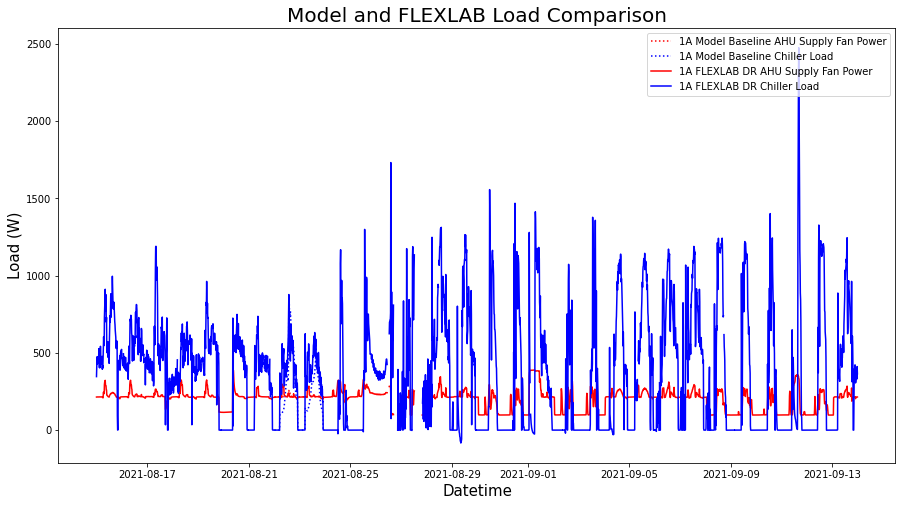

In [37]:
#data22['AHU: Supply Fan Power'].plot(kind='line',figsize=(15,8),legend=True)
#data22['Chiller_load'].plot(kind='line',figsize=(15,8),legend=True)
#data23['1A-El-AHU'].plot(kind='line',figsize=(15,8),legend=True)
#data23['Chiller_load'].plot(kind='line',figsize=(15,8),legend=True)

#data22_original['1A-El-CHWP'].plot(kind='line',figsize=(15,8),legend=True)
#data22_original['1A-El-Exhaust Fan'].plot(kind='line',figsize=(15,8),legend=True)






fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

lns1=ax_left.plot(data22.index,data22['AHU: Supply Fan Power'],'r:',label="1A Model Baseline AHU Supply Fan Power")
lns2=ax_left.plot(data22.index,data22['Chiller_load'],'b:', label="1A Model Baseline Chiller Load")
lns3=ax_left.plot(df.index,df['1A-El-AHU'],'r-', label="1A FLEXLAB DR AHU Supply Fan Power")
lns4=ax_left.plot(df.index,df['Chiller_load'],'b-', label="1A FLEXLAB DR Chiller Load")
plt.title('Model and FLEXLAB Load Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Load (W)',fontsize=15)

lns=lns1+lns2+lns3+lns4
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
#ax_left.set_ylim([50,68.3])
#ax_right.set_ylim([-0.1,2.4])
plt.show()

In [38]:
df.dtypes

desk1_plug_power                         float64
desk2_plug_power                         float64
desk3_plug_power                         float64
desk4_plug_power                         float64
desk5_plug_power                         float64
desk6_plug_power                         float64
desk3_light_power                        float64
desk4_light_power                        float64
desk2_light_power                        float64
desk1_6_light_power                      float64
desk5_light_power                        float64
1A-VAV1-Zn_Temp                          float64
1A-VAV2-Zn_Temp                          float64
1A-VAV3-Zn_Temp                          float64
1A-VAV1-OccupiedCoolingSetpt             float64
1A-VAV1-UnoccupiedCoolingSetpt           float64
1A-VAV1-OccupiedHeatingSetpt             float64
1A-VAV1-UnoccupiedHeatingSetpt           float64
1A-VAV2-OccupiedCoolingSetpt             float64
1A-VAV2-UnoccupiedHeatingSetpt           float64
1A-VAV2-UnoccupiedCo

In [39]:
df1b.dtypes

desk3_light_power                        float64
desk1_light_power                        float64
desk5_light_power                        float64
desk2_light_power                        float64
desk6_light_power                        float64
desk4_light_power                        float64
desk1_plug_power                         float64
desk2_plug_power                         float64
desk3_plug_power                         float64
desk4_plug_power                         float64
desk5_plug_power                         float64
desk6_plug_power                         float64
1B-VAV1-Zn_Temp                          float64
1B-VAV2-Zn_Temp                          float64
1B-VAV3-Zn_Temp                          float64
1B-VAV1-OccupiedCoolingSetpt             float64
1B-VAV1-UnoccupiedCoolingSetpt           float64
1B-VAV1-OccupiedHeatingSetpt             float64
1B-VAV1-UnoccupiedHeatingSetpt           float64
1B-VAV2-OccupiedCoolingSetpt             float64
1B-VAV2-UnoccupiedHe

# Add Test and Experiment Data End

In [40]:
#df['timestamp_utc']=pd.to_datetime(df['datetime']).tz_localize(tz).tz_convert("UTC").dt.strftime("%Y-%m-%d %H:%M:%S%z")




#df['timestamp_utc']=pd.to_datetime(df['datetime']).dt.tz_convert("UTC").dt.strftime("%Y-%m-%d %H:%M:%S%z")
#df['timestamp_utc']=pd.to_datetime(df['datetime']).dt.tz_localize("UTC").dt.strftime("%Y-%m-%d %H:%M:%S%z")
#df['timestamp_utc']=pd.Timestamp(pd.to_datetime(df['datetime']),tz=tz).localize("UTC").strftime("%Y-%m-%d %H:%M:%S%z")
#comb_df['WeekEnd'] = comb_df['WeekEnd'].dt.tz_localize('US/Pacific')
#start_date_utc=pd.Timestamp(start_date,tz=tz).tz_convert("UTC").strftime("%Y-%m-%d %H:%M:%S%z")

In [41]:
# interpolation except for timestamp
for cname in df.columns:
    if re.search("datetime",cname):
        pass
    else:
        df[cname]=df[cname].interpolate()

        
for cname in df1b.columns:
    if re.search("datetime",cname):
        pass
    else:
        df1b[cname]=df1b[cname].interpolate()
# add time information.


#df['time']=pd.to_datetime(df['timestamp_utc']).dt.tz_convert("US/Pacific").dt.strftime("%Y-%m-%d %H:%M:%S")

df['time']=pd.to_datetime(df['datetime'])
df['hour']=pd.DatetimeIndex(df['time']).strftime("%H")
df['hour'].to_numpy().astype('float').astype('int')
df['day']=pd.to_datetime(df['time']).dt.strftime("%d").to_numpy().astype('int')


df1b['time']=pd.to_datetime(df1b['datetime'])
df1b['hour']=pd.DatetimeIndex(df1b['time']).strftime("%H")
df1b['hour'].to_numpy().astype('float').astype('int')
df1b['day']=pd.to_datetime(df1b['time']).dt.strftime("%d").to_numpy().astype('int')



In [42]:
#print(df)

In [43]:
# change column names
# this is only for XRA 

"""
df=df.rename(columns={"V_sa_1":"V_sa_0",
                  "V_ra_1":"V_ra_0",
                  "T_sa_1":"T_sa_0",
                  "T_ra_1":"T_ra_0",
                  "T_slab_1_0":"T_slab_0_0",
                  "T_slab_1_1":"T_slab_0_1",
                  "T_slab_1_2":"T_slab_0_2",
                  "T_zap_1_0":"T_zap_0_0",
                  "T_zap_1_1":"T_zap_0_1",
                  "T_hsp_1":"T_hsp_0",
                  "i_occ_1":"i_occ_0",
                  "i_vent_1":"i_vent_0",
                  "T_za_1":"T_za_0",
                  "Q_gain_1":"Q_gain_0",
                  "m_sa_1":"m_sa_0",
                  "Q_hc_1":"Q_hc_0",
                  "P_hp_1":"P_hp_0",
                  "pi_1":"i_heat_0"
                  })
"""
# zone air temperature is mean of two idbts sensors
#df['T_za_0']=(df['T_zap_0_1'].to_numpy()+df['T_zap_0_0'].to_numpy())/2

'\ndf=df.rename(columns={"V_sa_1":"V_sa_0",\n                  "V_ra_1":"V_ra_0",\n                  "T_sa_1":"T_sa_0",\n                  "T_ra_1":"T_ra_0",\n                  "T_slab_1_0":"T_slab_0_0",\n                  "T_slab_1_1":"T_slab_0_1",\n                  "T_slab_1_2":"T_slab_0_2",\n                  "T_zap_1_0":"T_zap_0_0",\n                  "T_zap_1_1":"T_zap_0_1",\n                  "T_hsp_1":"T_hsp_0",\n                  "i_occ_1":"i_occ_0",\n                  "i_vent_1":"i_vent_0",\n                  "T_za_1":"T_za_0",\n                  "Q_gain_1":"Q_gain_0",\n                  "m_sa_1":"m_sa_0",\n                  "Q_hc_1":"Q_hc_0",\n                  "P_hp_1":"P_hp_0",\n                  "pi_1":"i_heat_0"\n                  })\n'

In [44]:
# heatpump power + all plug load = total power
#df['P_all_0']=df['P_hp_0'].to_numpy()+df['Q_gain_0'].to_numpy()

In [45]:
# MPC setpoint addition.
def add_mpc_inputs(df_):
    forecast_hours=24

    hsp_o=70  # 21.11C heating setpoint occupied
    hsp_uo=60 # 15.56C

    csp_o=74
    csp_uo=80

    o_start=6 #from 5am 
    o_end=17  #till 20pm
    # one day hours
    one_day_hours=np.arange(24)    
    # one_day_hours=np.array((pd.Timestamp(current_time_local,tz="US/Pacific")+pd.timedelta_range(start='0 H', periods=forecast_hours,freq='1H')).strftime("%H")).astype('int')
    uo_idx=(one_day_hours<o_start)|(one_day_hours>o_end)
    o_idx=~uo_idx
    #hour_vec
    Thsp_base=np.zeros(forecast_hours)+(hsp_uo-32)/1.8
    Tcsp_base=np.zeros(forecast_hours)+(csp_uo-32)/1.8
    Thsp_base[o_idx]=(hsp_o-32)/1.8
    Tcsp_base[o_idx]=(csp_o-32)/1.8
    Thsp_base[5]=(68-32)/1.8 # 68F at 5AM.

    # price signal
    ER_evening=np.array([0.264,	0.241,	0.220,	0.221,	0.238	,0.378	,0.700,	0.466,	0.351	,0.297,	0.264,	0.241	,0.220,	0.221	,0.238,	0.292,	0.378,	0.592,	0.690,	0.700,	0.629,	0.541	,0.445	,0.405])


    hour_vec=df_['hour'].to_numpy().astype('int')#.astype('int')  #np.array((pd.Timestamp(current_time_local,tz="US/Pacific")+pd.timedelta_range(start='0 H', periods=forecast_hours*(3600/Ts),freq=pd.Timedelta(f"{Ts}sec"))).strftime("%H")).astype('int')
    Tcsp=Tcsp_base[hour_vec]
    Thsp=Thsp_base[hour_vec]
    prices=ER_evening[hour_vec]
    hvac_occ=(o_idx*1)[hour_vec]
    df_['Thsp']=Thsp
    df_['Tcsp']=Tcsp
    df_['price']=prices
    return df_

In [46]:
df=add_mpc_inputs(df)
df1b=add_mpc_inputs(df1b)

In [47]:
#df['time']
#df

In [48]:
#df.dtypes

In [49]:
#df.index

In [50]:
#df1b.dtypes

In [51]:

# G36+baseline days: 1A(Aug: 30,31; Sep: 2,3,9,10,11,12,13) 1B(Aug: 15)

test_case=3 # 1:baseline, 2:shed, 3: shift


if test_case==1: # G36+baseline days: 1A(Aug: 30,31; Sep: 2,3,9,10,11,12,13) 1B(Aug: 15)
    mpc_days=np.array([30,31,2,3,9,10,11,12,13])  
    mpc_days_1b=np.array([15])  
# make sure you don't have overlapping days in your "Flexlab_HIL_DA_db_query_file.ipynb"
# since this code doesn't take into account of the month that the day is in

elif test_case==2: # G36+shed days: 1A() 1B(Aug: 22,23; Sep: 2,3,10,11,12,13)
    mpc_days=np.array([])  
    mpc_days_1b=np.array([22,23,2,3,10,11,12,13]) 

elif test_case==3: # G36+shift days: 1A() 1B(Aug: 28,29,30,31; Sep: 4,5,6,9)
    mpc_days=np.array([])  
    mpc_days_1b=np.array([28,29,30,31,4,5,6,9]) 


    
    
control_case=1 # 1:baseline, 2:shed, 3: shift


if control_case==1: # G36+baseline days: 1A(Aug: 30,31; Sep: 2,3,9,10,11,12,13) 1B(Aug: 15)
    baseline_days=np.array([30,31,2,3,9,10,11,12,13])  
    baseline_days_1b=np.array([15])  
# make sure you don't have overlapping days in your "Flexlab_HIL_DA_db_query_file.ipynb"
# since this code doesn't take into account of the month that the day is in

elif control_case==2: # G36+shed days: 1A() 1B(Aug: 22,23; Sep: 2,3,10,11,12,13)
    baseline_days=np.array([])  
    baseline_days_1b=np.array([22,23,2,3,10,11,12,13]) 

elif control_case==3: # G36+shift days: 1A() 1B(Aug: 28,29,30,31; Sep: 4,5,6,9)
    baseline_days=np.array([])  
    baseline_days_1b=np.array([28,29,30,31,4,5,6,9])    
    



#  basecase
#baseline_days=np.array([22,23])
#baseline_days_1b=np.array([15])
#all_days=np.concatenate([mpc_days,baseline_days])
#all_days_1b=np.concatenate([mpc_days_1b,baseline_days_1b])

In [52]:
#print(all_days)
#print(all_days_1b)

In [53]:

"""
def calculate_ma(df_,rolling_mins,col_name):
    df[f'ma_{col_name}']=df[f'{col_name}'].rolling(rolling_mins,center=True,min_periods=1).mean()#
    return df_
"""

"\ndef calculate_ma(df_,rolling_mins,col_name):\n    df[f'ma_{col_name}']=df[f'{col_name}'].rolling(rolling_mins,center=True,min_periods=1).mean()#\n    return df_\n"

In [54]:
# calculate moving average (smoothing)
#rolling_mins=30 #moving average interval (30-timestep: 30mins)

#df=calculate_ma(df_=df,rolling_mins=rolling_mins,col_name="i_heat_0")
#df=calculate_ma(df_=df,rolling_mins=rolling_mins,col_name="P_hp_0")
#df=calculate_ma(df_=df,rolling_mins=rolling_mins,col_name="P_all_0")


In [55]:
df['mpc']=(df.day.isin(mpc_days)).to_numpy()*1 #mpc days as True
df['baseline']=(df.day.isin(baseline_days)).to_numpy()*1 #baseline days as True
# ultimate the basecase data is from a different source

df1b['mpc']=(df1b.day.isin(mpc_days_1b)).to_numpy()*1 #mpc days as True
df1b['baseline']=(df1b.day.isin(baseline_days_1b)).to_numpy()*1 #baseline days as True


In [56]:
hours=df['hour'].to_numpy().astype('int') #hour 
#df['peak']=(((hours>=5) &(hours<=7))|((hours>=17) &(hours<=21)))*1 #masking peak period
#df1b['peak']=(((hours>=5) &(hours<=7))|((hours>=17) &(hours<=21)))*1 #masking peak period




#df['peak']=((hours>=14) &(hours<18))*1
#df1b['peak']=((hours>=14) &(hours<18))*1
df['peak']=(  ((df["time"].apply(lambda x : x.hour)>=14) & (df["time"].apply(lambda x : x.hour)<18))  |  ((df["time"].apply(lambda x : x.hour)==18) & (df["time"].apply(lambda x : x.minute)==0))    )*1
df1b['peak']=(  ((df1b["time"].apply(lambda x : x.hour)>=14) & (df1b["time"].apply(lambda x : x.hour)<18)) | ((df1b["time"].apply(lambda x : x.hour)==18) & (df1b["time"].apply(lambda x : x.minute)==0))   )*1

df['precool']=(  ((df["time"].apply(lambda x : x.hour)>=10) & (df["time"].apply(lambda x : x.hour)<14))  |  ((df["time"].apply(lambda x : x.hour)==14) & (df["time"].apply(lambda x : x.minute)==0))    )*1
df1b['precool']=(  ((df1b["time"].apply(lambda x : x.hour)>=10) & (df1b["time"].apply(lambda x : x.hour)<14)) | ((df1b["time"].apply(lambda x : x.hour)==14) & (df1b["time"].apply(lambda x : x.minute)==0))   )*1


In [57]:
#print(df1b)

In [58]:
# timeseries plot
import copy
sdf=copy.deepcopy(df)
sdf['time']=pd.DatetimeIndex(sdf['time'],tz=tz)
sdf=sdf.set_index("time")
sdf1b=copy.deepcopy(df1b)
sdf1b['time']=pd.DatetimeIndex(sdf1b['time'],tz=tz)
sdf1b=sdf1b.set_index("time")

In [59]:
#print(sdf)
#print(sdf1b)

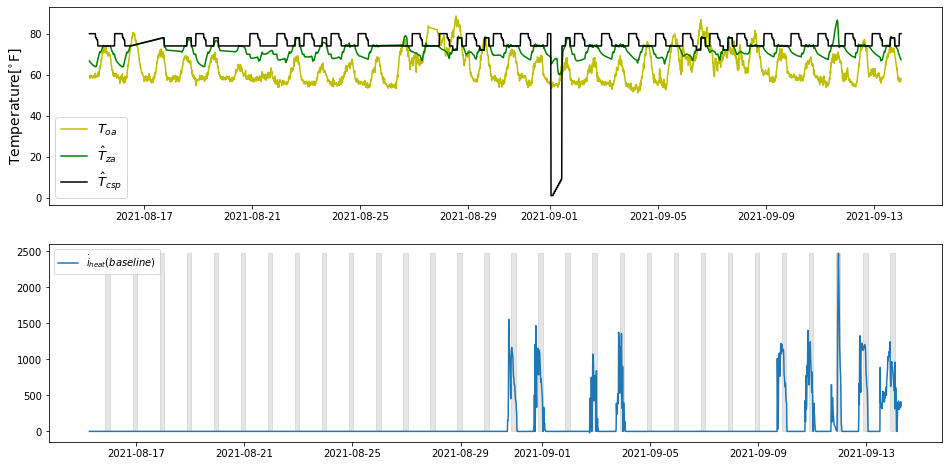

In [60]:

fig, ax=plt.subplots(nrows=2,ncols=1,figsize=(16,8))
#ax[0].plot(sdf.index.values,sdf['T_oa'].to_numpy(),label=r"$T_{oa}$",color='y')
ax[0].plot(sdf.index.values,sdf['1B-OAT-1'].to_numpy(),label=r"$T_{oa}$",color='y')


#ax[0].plot(sdf.index.values,sdf['T_za_0'],label=r"$\hat{T}_{za}$",color='g')
#ax[0].plot(sdf.index.values,sdf['T_hsp_0'],label=r"$\hat{T}_{hsp}$",color='k')

ax[0].plot(sdf.index.values,sdf['1A-VAV3-Zn_Temp'],label=r"$\hat{T}_{za}$",color='g')
ax[0].plot(sdf.index.values,sdf['1A-VAV3-OccupiedCoolingSetpt'],label=r"$\hat{T}_{csp}$",color='k')


ax[0].xaxis_date(tz=tz)
ax[0].legend(fontsize=13)
ax[0].set_ylabel("Temperature[$^{\circ}$F]",fontsize=14)
#ax[1].plot(sdf.index.values,sdf['ma_i_heat_0'].to_numpy()*sdf['baseline'].to_numpy(),label=r"$\dot{i}_{heat}(baseline)$",color='tab:blue')
if baseline_days.size != 0:
    ax[1].plot(sdf.index.values,sdf['Chiller_load'].to_numpy()*sdf['baseline'].to_numpy(),label=r"$\dot{i}_{heat}(baseline)$",color='tab:blue')

#ax[1].plot(sdf.index.values,sdf['ma_i_heat_0'].to_numpy()*sdf['mpc'].to_numpy(),label=r"$\dot{i}_{heat}(mpc)$",color='tab:red')
if mpc_days.size != 0:
    ax[1].plot(sdf.index.values,sdf['Chiller_load'].to_numpy()*sdf['mpc'].to_numpy(),label=r"$\dot{i}_{heat}(mpc)$",color='tab:red')

#ax[1].plot(sdf.index.values,sdf['i_ma_baseline'].to_numpy(),label=r"$\dot{i}_{heat}(baseline)$",color='tab:blue')
#ax[1].plot(sdf.index.values,sdf['i_ma_mpc_hybrid'].to_numpy(),label=r"$\dot{i}_{heat}(hybrid)$",color='tab:orange')
#ax[1].fill_between(sdf.index.values,0,np.max(sdf['ma_i_heat_0'].to_numpy()),where=sdf['peak'].to_numpy(),alpha=0.2,color='grey')
ax[1].fill_between(sdf.index.values,0,np.max(sdf['Chiller_load'].to_numpy()),where=sdf['peak'].to_numpy(),alpha=0.2,color='grey')
#ax[1].fill_between(sdf.index.values,0,np.max(sdf['cooling_power [W]'].to_numpy()),where=sdf['peak'].to_numpy(),alpha=0.2,color='grey')
ax[1].legend()

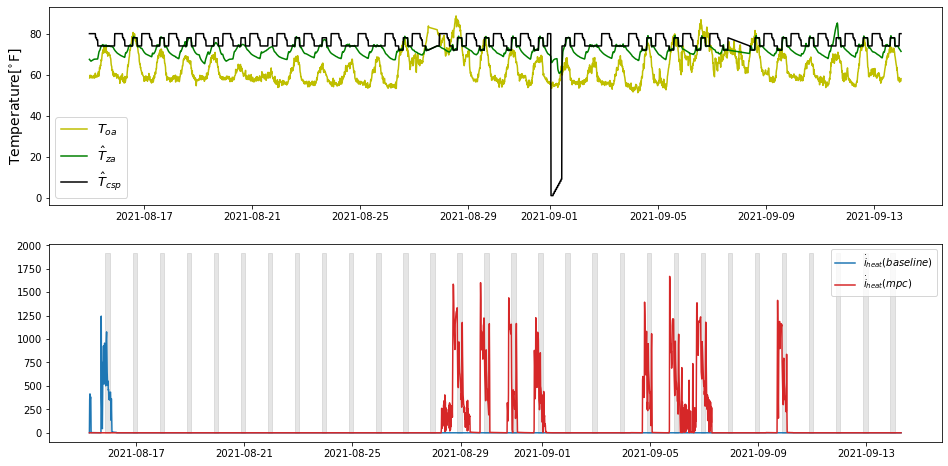

In [61]:

fig, ax=plt.subplots(nrows=2,ncols=1,figsize=(16,8))
#ax[0].plot(sdf1b.index.values,sdf1b['T_oa'].to_numpy(),label=r"$T_{oa}$",color='y')
ax[0].plot(sdf1b.index.values,sdf1b['1B-OAT-1'].to_numpy(),label=r"$T_{oa}$",color='y')


#ax[0].plot(sdf1b.index.values,sdf1b['T_za_0'],label=r"$\hat{T}_{za}$",color='g')
#ax[0].plot(sdf1b.index.values,sdf1b['T_hsp_0'],label=r"$\hat{T}_{hsp}$",color='k')

ax[0].plot(sdf1b.index.values,sdf1b['1B-VAV3-Zn_Temp'],label=r"$\hat{T}_{za}$",color='g')
ax[0].plot(sdf1b.index.values,sdf1b['1B-VAV3-OccupiedCoolingSetpt'],label=r"$\hat{T}_{csp}$",color='k')


ax[0].xaxis_date(tz=tz)
ax[0].legend(fontsize=13)
ax[0].set_ylabel("Temperature[$^{\circ}$F]",fontsize=14)
#ax[1].plot(sdf1b.index.values,sdf1b['ma_i_heat_0'].to_numpy()*sdf1b['baseline'].to_numpy(),label=r"$\dot{i}_{heat}(baseline)$",color='tab:blue')
if baseline_days_1b.size != 0:
    ax[1].plot(sdf1b.index.values,sdf1b['Chiller_load'].to_numpy()*sdf1b['baseline'].to_numpy(),label=r"$\dot{i}_{heat}(baseline)$",color='tab:blue')

#ax[1].plot(sdf1b.index.values,sdf1b['ma_i_heat_0'].to_numpy()*sdf1b['mpc'].to_numpy(),label=r"$\dot{i}_{heat}(mpc)$",color='tab:red')
if mpc_days_1b.size != 0:
    ax[1].plot(sdf1b.index.values,sdf1b['Chiller_load'].to_numpy()*sdf1b['mpc'].to_numpy(),label=r"$\dot{i}_{heat}(mpc)$",color='tab:red')

#ax[1].plot(sdf1b.index.values,sdf1b['i_ma_baseline'].to_numpy(),label=r"$\dot{i}_{heat}(baseline)$",color='tab:blue')
#ax[1].plot(sdf1b.index.values,sdf1b['i_ma_mpc_hybrid'].to_numpy(),label=r"$\dot{i}_{heat}(hybrid)$",color='tab:orange')
#ax[1].fill_between(sdf1b.index.values,0,np.max(sdf1b['ma_i_heat_0'].to_numpy()),where=sdf1b['peak'].to_numpy(),alpha=0.2,color='grey')
ax[1].fill_between(sdf1b.index.values,0,np.max(sdf1b['Chiller_load'].to_numpy()),where=sdf1b['peak'].to_numpy(),alpha=0.2,color='grey')
#ax[1].fill_between(sdf1b.index.values,0,np.max(sdf1b['cooling_power [W]'].to_numpy()),where=sdf1b['peak'].to_numpy(),alpha=0.2,color='grey')
ax[1].legend()

In [62]:
import copy

# figure controlling parameters
highlight="avg" # "max" or "avg" #put "avg" for highlight average profile
sdf=copy.deepcopy(df)
sdf1b=copy.deepcopy(df1b)
n_data=int(4*24) #60*12 #total number of data in each day (60 minutes x 24 hours)
n_select=int(4*24) # selecting period. We select 0-11HR  for only morning data.
# visualizing either heating signal (ma_i_heat_0), Heatpump power (ma_P_hp_0), or total power (ma_P_all_0)
target='cooling_power [W]'#"ma_i_heat_0" # ma_P_hp_0, ma_P_all_0 
#target="ma_P_all_0"#"ma_i_heat_0" # ma_P_hp_0, ma_P_all_0 


####################################################################
###################### Visualization#############################
sdf['time']=pd.DatetimeIndex(sdf['time'],tz="US/Pacific")
sdf=sdf.set_index("time")

sdf1b['time']=pd.DatetimeIndex(sdf1b['time'],tz="US/Pacific")
sdf1b=sdf1b.set_index("time")


if baseline_days.size != 0:
    iisdf=sdf[sdf['day']==baseline_days[0]]
else:
    iisdf=sdf1b[sdf1b['day']==baseline_days_1b[0]]
# iisdf is only used to find time periods of peak 2-6pm and precool 10-2pm
# iisdf here can come from either df or df1b


x_grid=np.arange(n_data) 
y_grid=np.zeros_like(x_grid)

In [63]:
print(n_select)

96


In [64]:
print(iisdf)

                           desk1_plug_power  desk2_plug_power  \
time                                                            
2021-08-30 00:00:00-07:00         33.890180          8.055973   
2021-08-30 00:15:00-07:00         33.981800          7.909860   
2021-08-30 00:30:00-07:00         34.255800          8.000967   
2021-08-30 00:45:00-07:00         34.130960          7.971087   
2021-08-30 01:00:00-07:00         34.039820          7.997360   
...                                     ...               ...   
2021-08-30 22:45:00-07:00         33.673633          7.954733   
2021-08-30 23:00:00-07:00         34.438660          7.913560   
2021-08-30 23:15:00-07:00         33.593180          8.032307   
2021-08-30 23:30:00-07:00         34.675633          8.067267   
2021-08-30 23:45:00-07:00         33.659720          7.779747   

                           desk3_plug_power  desk4_plug_power  \
time                                                            
2021-08-30 00:00:00-07:0

In [65]:
print(x_grid)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]


In [66]:
print(y_grid)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


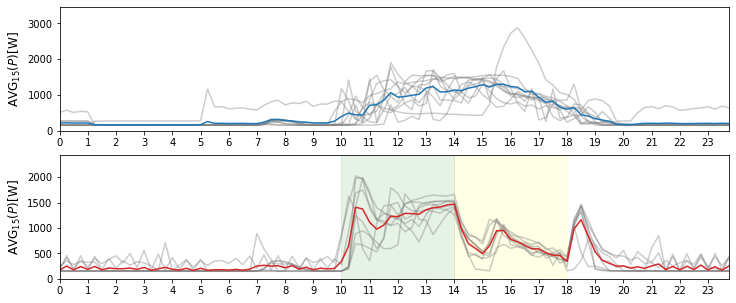

In [67]:


fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(12,5))
# visualze individual profile + calculating average/maximum profile


if baseline_days.size != 0:
    for  i,i_day in enumerate(baseline_days):
        isdf=sdf[sdf['day']==i_day]
        #print(isdf)
        if i==0:
            i_ma_avg=y_grid*0.0
            #print(i_ma_avg)
            temp=isdf[f'{target}'].to_numpy()[:n_select] # [:n_select] means "take the first n_select-th data values"
            #print('kb1')
            #print(temp)
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            #print('kb2')
            #print(i_ma_max)
            max_val=np.max(i_ma_max)
            #print('kb3')
            #print(max_val)
        temp=isdf[f'{target}'].to_numpy()[:n_select]
        y_grid_temp=y_grid*0.0
        y_grid_temp[:(temp.shape[0])]=temp
        ax[0].plot(x_grid,y_grid_temp,alpha=0.4,color="gray") # visualize individual data

        i_ma_avg[:(temp.shape[0])]=i_ma_avg[:(temp.shape[0])]+temp 
        #shape[0] probably gives the number of rows, or number of entries if 1D array 
        # for all the days, add up the load before 11 am
        #print('kb4')
        #print(i_ma_avg)
        max_val_temp=np.max(temp) 
        if max_val_temp>max_val: # looks like "max_val" is the first day maximum load
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=max_val_temp 
            # if the following days (not the first day) have a higher max load, update "max_val" to that max load
            # also update "i_ma_max" to represent the day with the highest max load
        

if baseline_days_1b.size != 0:
    for  i,i_day in enumerate(baseline_days_1b):
        isdf1b=sdf1b[sdf1b['day']==i_day]
        #print(isdf)
        if baseline_days.size == 0:
            if i==0:
                i_ma_avg=y_grid*0.0
                #print(i_ma_avg)
                temp=isdf1b[f'{target}'].to_numpy()[:n_select] # [:n_select] means "take the first n_select-th data values"
                #print('kb1')
                #print(temp)
                i_ma_max=y_grid*0.0
                i_ma_max[:temp.shape[0]]=temp
                #print('kb2')
                #print(i_ma_max)
                max_val=np.max(i_ma_max)
                #print('kb3')
                #print(max_val)
        temp=isdf1b[f'{target}'].to_numpy()[:n_select]
        y_grid_temp=y_grid*0.0
        y_grid_temp[:(temp.shape[0])]=temp
        ax[0].plot(x_grid,y_grid_temp,alpha=0.4,color="gray") # visualize individual data

        i_ma_avg[:(temp.shape[0])]=i_ma_avg[:(temp.shape[0])]+temp 
        #shape[0] probably gives the number of rows, or number of entries if 1D array 
        # for all the days, add up the load before 11 am
        #print('kb4')
        #print(i_ma_avg)
        max_val_temp=np.max(temp) 
        if max_val_temp>max_val: # looks like "max_val" is the first day maximum load
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=max_val_temp 
            # if the following days (not the first day) have a higher max load, update "max_val" to that max load
            # also update "i_ma_max" to represent the day with the highest max load        
        

if baseline_days.size == 0:
    i_ma_avg=i_ma_avg/baseline_days_1b.shape[0]
elif baseline_days_1b.size == 0: 
    i_ma_avg=i_ma_avg/baseline_days.shape[0]
else:
    i_ma_avg=i_ma_avg/(baseline_days.shape[0]+baseline_days_1b.shape[0])        
        




i_ma_avg_baseline=i_ma_avg
i_ma_max_baseline=i_ma_max



if highlight=="max":
    ax[0].plot(x_grid,i_ma_max_baseline,color='tab:blue')
    #print(i_ma_max)
    ax[0].axhline(y=max_val, color='r', linestyle='dashed',linewidth=0.5) # the dashed horizontal line
    print(f'baseline: {max_val}')
else:
    ax[0].plot(x_grid,i_ma_avg,color='tab:blue')
    
    
#plotting the i_ma_avg or i_ma_max as blue line



if ((control_case==2) or (control_case==3)):
    ax[0].fill_between(np.arange(iisdf.shape[0]),0,max_val*1.5,where=iisdf['peak'].to_numpy(),alpha=0.1,color='yellow')
# "*1.5" is very random, just to make sure that you fill the whole y spectrum 
if control_case==3:
    ax[0].fill_between(np.arange(iisdf.shape[0]),0,max_val*1.5,where=iisdf['precool'].to_numpy(),alpha=0.1,color='green')


ax[0].set_xticks(np.arange(24)*4)
ax[0].set_xticklabels((np.arange(0,(24))).astype('int'))
ax[0].set_ylim(0,np.max(i_ma_max)*1.2)
ax[0].margins(x=0)
if highlight=="max":
    ax[0].set_ylabel(r"MA$_{15}(P)$[W]",fontsize=12)
else:
    ax[0].set_ylabel(r"AVG$_{15}(P)$[W]",fontsize=12)
    
    
#print('kb5')
#print(np.max(sdf[f'{target}'].to_numpy()))  
    
    
#--------------------------------------------------------------------------------------------

if mpc_days.size != 0:
    for i,i_day in enumerate(mpc_days):
        isdf=sdf[sdf['day']==i_day]
        if i==0:
            i_ma_avg=y_grid*0.0
            temp=isdf[f'{target}'].to_numpy()[:n_select]
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=np.max(i_ma_max)



        temp=isdf[f'{target}'].to_numpy()[:n_select]
        y_grid_temp=y_grid*0.0
        y_grid_temp[:temp.shape[0]]=temp

        ax[1].plot(x_grid,y_grid_temp,alpha=0.4,color="gray")
        i_ma_avg[:(temp.shape[0])]=i_ma_avg[:(temp.shape[0])]+temp
        max_val_temp=np.max(temp) #np.max(isdf[f'{target}'].to_numpy()[:n_data])

        if max_val_temp>max_val:
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=max_val_temp 
            

if mpc_days_1b.size != 0:          
    for i,i_day in enumerate(mpc_days_1b):
        isdf1b=sdf1b[sdf1b['day']==i_day]
        
        if mpc_days.size == 0:
            if i==0:
                i_ma_avg=y_grid*0.0
                temp=isdf1b[f'{target}'].to_numpy()[:n_select]
                i_ma_max=y_grid*0.0
                i_ma_max[:temp.shape[0]]=temp
                max_val=np.max(i_ma_max)        
        
        temp=isdf1b[f'{target}'].to_numpy()[:n_select]
        y_grid_temp=y_grid*0.0
        y_grid_temp[:temp.shape[0]]=temp

        ax[1].plot(x_grid,y_grid_temp,alpha=0.4,color="gray")
        i_ma_avg[:(temp.shape[0])]=i_ma_avg[:(temp.shape[0])]+temp
        max_val_temp=np.max(temp) #np.max(isdf[f'{target}'].to_numpy()[:n_data])

        if max_val_temp>max_val:
            i_ma_max=y_grid*0.0
            i_ma_max[:temp.shape[0]]=temp
            max_val=max_val_temp 
        

if mpc_days.size == 0:
    i_ma_avg=i_ma_avg/mpc_days_1b.shape[0]
elif mpc_days_1b.size == 0: 
    i_ma_avg=i_ma_avg/mpc_days.shape[0]
else:
    i_ma_avg=i_ma_avg/(mpc_days.shape[0]+mpc_days_1b.shape[0])



i_ma_avg_mpc_ideal=i_ma_avg
i_ma_max_mpc_ideal=i_ma_max


if highlight=="max":
    ax[1].plot(x_grid,i_ma_max_mpc_ideal,color='tab:red')
    ax[1].axhline(y=max_val, color='r', linestyle='dashed',linewidth=0.5)
    print(f'ideal: {max_val}')
else:
    ax[1].plot(x_grid,i_ma_avg_mpc_ideal,label=r"$mean_i_{heat}(ideal)$",color='tab:red')
    
#if mpc_days.size != 0:    
#ax[1].fill_between(np.arange(iisdf.shape[0]),0,np.max(sdf[f'{target}'].to_numpy()*1.5),where=iisdf['peak'].to_numpy(),alpha=0.2,color='grey')  

if ((test_case==2) or (test_case==3)):
    ax[1].fill_between(np.arange(iisdf.shape[0]),0,max_val*1.5,where=iisdf['peak'].to_numpy(),alpha=0.1,color='yellow') 
if test_case==3:
    ax[1].fill_between(np.arange(iisdf.shape[0]),0,max_val*1.5,where=iisdf['precool'].to_numpy(),alpha=0.1,color='green')


ax[1].set_xticks(np.arange(24)*4)
ax[1].set_xticklabels((np.arange(0,(24))).astype('int'))
ax[1].set_ylim(0,np.max(i_ma_max)*1.2)
ax[1].margins(x=0)
if highlight=="max":
    ax[1].set_ylabel(r"MA$_{15}(P)$[W]",fontsize=12)
else: 
    ax[1].set_ylabel(r"AVG$_{15}(P)$[W]",fontsize=12)

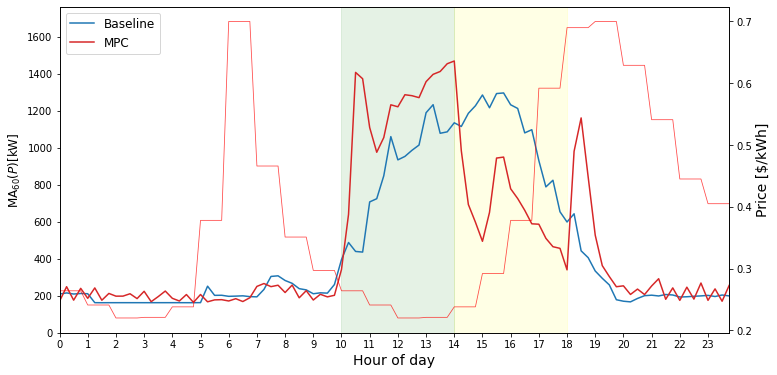

In [68]:


#iisdf=sdf[sdf['day']==baseline_days[0]]
if baseline_days.size != 0:
    iisdf=sdf[sdf['day']==baseline_days[0]]
else:
    iisdf=sdf1b[sdf1b['day']==baseline_days_1b[0]]

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(12,6))

ax2 = ax.twinx()
ax.plot(i_ma_avg_baseline,label=r"Baseline",color="tab:blue")
ax.plot(i_ma_avg_mpc_ideal,label=r"MPC",color="tab:red")

#ax.fill_between(np.arange(iisdf.shape[0]),-1,np.max(sdf[f'{target}'].to_numpy())*1.5,where=iisdf['peak'].to_numpy(),alpha=0.1,color='yellow') 
#ax.fill_between(np.arange(iisdf.shape[0]),-1,np.max(sdf[f'{target}'].to_numpy())*1.5,where=iisdf['precool'].to_numpy(),alpha=0.1,color='green')  
if ((test_case==2) or (test_case==3)):
    ax.fill_between(np.arange(iisdf.shape[0]),-1,max_val*1.5,where=iisdf['peak'].to_numpy(),alpha=0.1,color='yellow') 
if test_case==3:
    ax.fill_between(np.arange(iisdf.shape[0]),-1,max_val*1.5,where=iisdf['precool'].to_numpy(),alpha=0.1,color='green')  



ax.set_xticks(np.arange(24)*4)
ax.set_xticklabels((np.arange(0,(24))).astype('int'))
ax.set_xlabel("Hour of day",fontsize=14)
#ax.set_ylabel(f"{target}",fontsize=14)
ax.set_ylabel(r"",fontsize=14)

ax2.plot(iisdf['price'].to_numpy(),label=r'Price',color="red",alpha=0.7,linewidth=0.8)
ax.set_ylabel(r"MA$_{60}(P)$[kW]",fontsize=12)
ax2.set_ylabel("Price [$/kWh]",fontsize=14)
ax.legend(fontsize=12,loc="upper left")
ax.margins(x=0)
ax.set_ylim((0,np.max([np.max(i_ma_avg_mpc_ideal),np.max(i_ma_avg_baseline)])*1.2))
fig.savefig("price.png",dpi=300,bbox_inches='tight')
